## Initialization

In [1]:
# !pip install netCDF4
!pip install matplotlib xarray numpy
!pip install Cartopy
!pip install geopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 34.0 MB/s eta 0:00:00


In [2]:
# import netCDF4
import numpy as np
import numpy as np
from scipy.optimize import curve_fit
import xarray as xr
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from numpy.lib.stride_tricks import sliding_window_view
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import requests
import geocoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)
from plotly.subplots import make_subplots
import seaborn as sns
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib.patches import Patch, Circle

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


## Global Land Temperature

In [4]:
dataDir = 'drive/Shareddrives/TAMIDS Data Science Competition 2024/0_data/Temperature/'
dataFile = 'GlobalLandTemperaturesByState.csv'

# !ls $dataDir
# # !wget -P $dataDir $dataSrc
# !ls $dataDir
dataFile = dataDir + dataFile

In [5]:
df = pd.read_csv(dataFile)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


In [6]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [7]:
df['dt'] = pd.to_datetime(df['dt'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             645675 non-null  datetime64[ns]
 1   AverageTemperature             620027 non-null  float64       
 2   AverageTemperatureUncertainty  620027 non-null  float64       
 3   State                          645675 non-null  object        
 4   Country                        645675 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 24.6+ MB


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [8]:
df['dt'].max()

Timestamp('2013-09-01 00:00:00')

## City Temperature


In [9]:
dataDir = 'drive/Shareddrives/TAMIDS Data Science Competition 2024/0_data/Temperature/'
dataFile = 'city_temperature.csv'

dataFile = dataDir + dataFile

df = pd.read_csv(dataFile)
df.info()
df.head()

<ipython-input-9-232793710a5a>:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataFile)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [10]:
df_us = df[df['Country'] == 'US']
df_us.info()
df_us.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1455337 entries, 1450990 to 2906326
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Region          1455337 non-null  object 
 1   Country         1455337 non-null  object 
 2   State           1455337 non-null  object 
 3   City            1455337 non-null  object 
 4   Month           1455337 non-null  int64  
 5   Day             1455337 non-null  int64  
 6   Year            1455337 non-null  int64  
 7   AvgTemperature  1455337 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 99.9+ MB


,Region,Country,State,City,Month,Day,Year,AvgTemperature
1450990,North America,US,Alabama,Birmingham,1,1,1995,50.7
1450991,North America,US,Alabama,Birmingham,1,2,1995,37.2
1450992,North America,US,Alabama,Birmingham,1,3,1995,33.2
1450993,North America,US,Alabama,Birmingham,1,4,1995,33.3
1450994,North America,US,Alabama,Birmingham,1,5,1995,26.4


## Add Geo Data

In [11]:
data = df.copy()
# data.drop(columns='State', inplace=True)
print("data.shape=", data.shape)

data['Year']=data['Year'].astype('str')

# 8 rows with day=0
data=data.loc[data.Day!=0]

print("data.shape=", data.shape)

# Clean data with invalid year
def counting(year):
    c= len(year)
    if c<4:
        return 0
    else:
        return year

data['Year']=data.Year.apply(counting)

#440 rows with year= 202
data = data.loc[data.Year!=0]

print("data.shape=", data.shape)

# Clean invalid temperature
data=data.loc[data.AvgTemperature!=-99]

print("data.shape=", data.shape)

data.shape= (2906327, 8)
data.shape= (2906319, 8)
data.shape= (2905879, 8)
data.shape= (2826655, 8)


In [12]:
df_us = data[data['Country'] == 'US']
df_us.info()
df_us.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1450555 entries, 1450990 to 2906326
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Region          1450555 non-null  object 
 1   Country         1450555 non-null  object 
 2   State           1450555 non-null  object 
 3   City            1450555 non-null  object 
 4   Month           1450555 non-null  int64  
 5   Day             1450555 non-null  int64  
 6   Year            1450555 non-null  object 
 7   AvgTemperature  1450555 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 99.6+ MB


,Region,Country,State,City,Month,Day,Year,AvgTemperature
1450990,North America,US,Alabama,Birmingham,1,1,1995,50.7
1450991,North America,US,Alabama,Birmingham,1,2,1995,37.2
1450992,North America,US,Alabama,Birmingham,1,3,1995,33.2
1450993,North America,US,Alabama,Birmingham,1,4,1995,33.3
1450994,North America,US,Alabama,Birmingham,1,5,1995,26.4


In [13]:
df_us['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Maryland', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Additional Territories'],
      dtype=object)

In [14]:
states = gpd.read_file("drive/Shareddrives/TAMIDS Data Science Competition 2024/0_data/Temperature/cb_2018_us_state_500k/")

In [15]:
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   56 non-null     object  
 1   STATENS   56 non-null     object  
 2   AFFGEOID  56 non-null     object  
 3   GEOID     56 non-null     object  
 4   STUSPS    56 non-null     object  
 5   NAME      56 non-null     object  
 6   LSAD      56 non-null     object  
 7   ALAND     56 non-null     int64   
 8   AWATER    56 non-null     int64   
 9   geometry  56 non-null     geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 4.5+ KB


In [17]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [ ]:
# states['NAME']

In [18]:
# Assuming 'State' in df_us and 'NAME' in states are already standardized and can be used for merging
# You might need to rename 'NAME' in states to 'State' for a straightforward merge
states_renamed = states.rename(columns={"NAME": "State"})

# Now perform the merge
df_us_with_geo = pd.merge(df_us, states_renamed[['State', 'geometry']], on='State', how='left')


In [19]:
df_us_with_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450555 entries, 0 to 1450554
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   Region          1450555 non-null  object  
 1   Country         1450555 non-null  object  
 2   State           1450555 non-null  object  
 3   City            1450555 non-null  object  
 4   Month           1450555 non-null  int64   
 5   Day             1450555 non-null  int64   
 6   Year            1450555 non-null  object  
 7   AvgTemperature  1450555 non-null  float64 
 8   geometry        1444467 non-null  geometry
dtypes: float64(1), geometry(1), int64(2), object(5)
memory usage: 99.6+ MB


In [20]:
df_us_with_geo['Year']=df_us_with_geo['Year'].astype('int64')

In [21]:
df_us_with_geo['Year'].min()

1995

In [22]:
df_us_with_geo['Year'].max()

2020

In [23]:
dec_2020_temps = df_us_with_geo[(df_us_with_geo['Year'] == 2019) & (df_us_with_geo['Month'] == 12)]
dec_2020_temps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4743 entries, 9085 to 1444332
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Region          4743 non-null   object  
 1   Country         4743 non-null   object  
 2   State           4743 non-null   object  
 3   City            4743 non-null   object  
 4   Month           4743 non-null   int64   
 5   Day             4743 non-null   int64   
 6   Year            4743 non-null   int64   
 7   AvgTemperature  4743 non-null   float64 
 8   geometry        4743 non-null   geometry
dtypes: float64(1), geometry(1), int64(3), object(4)
memory usage: 370.5+ KB


In [24]:
state_avg_temps_dec_2020 = dec_2020_temps.groupby('State')['AvgTemperature'].mean().reset_index()
state_avg_temps_dec_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           50 non-null     object 
 1   AvgTemperature  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 928.0+ bytes


In [ ]:
# state_avg_temps_dec_2020

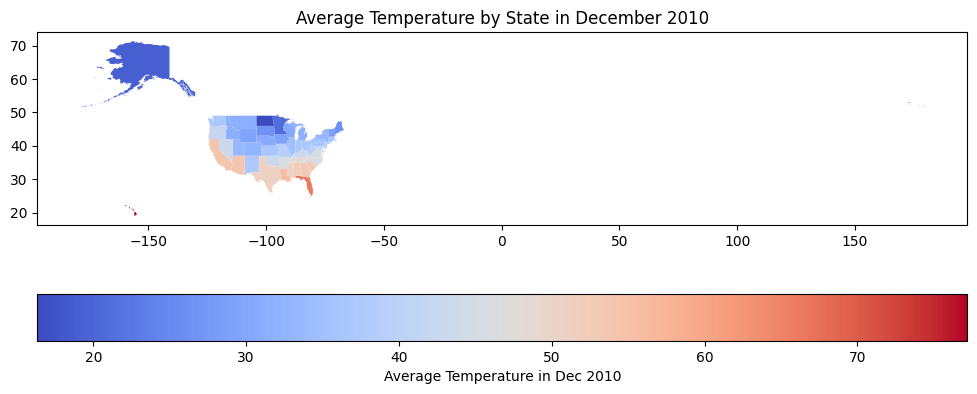

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Rename the 'NAME' column in 'states' to match the 'State' column in your temperature DataFrame, if needed
states_renamed = states.rename(columns={"NAME": "State"})

# Merge to add geometry
dec_2020_geo = states_renamed.merge(state_avg_temps_dec_2020, on='State')


# Ensure the merged data is a GeoDataFrame
if not isinstance(dec_2020_geo, gpd.GeoDataFrame):
    dec_2020_geo = gpd.GeoDataFrame(dec_2020_geo, geometry='geometry')

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
dec_2020_geo.plot(column='AvgTemperature', ax=ax, legend=True, cmap='coolwarm',
                  legend_kwds={'label': "Average Temperature in Dec 2010", 'orientation': "horizontal"})
ax.set_title('Average Temperature by State in December 2010')
plt.show()


## Temperature change 1999 - 2019 for each state

In [40]:
# Convert 'Year' to numeric if it's not already
df_us['Year'] = pd.to_numeric(df_us['Year'])

# Filter for 2019
temps_2019 = df_us[df_us['Year'] == 2019]

# Filter for 1999
temps_1999 = df_us[df_us['Year'] == 1999]


<ipython-input-40-e3ab852615ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['Year'] = pd.to_numeric(df_us['Year'])


In [41]:
# Calculate mean temperature by state for 2019
avg_temps_2019 = temps_2019.groupby('State')['AvgTemperature'].mean().reset_index()

# Calculate mean temperature by state for 1999
avg_temps_1999 = temps_1999.groupby('State')['AvgTemperature'].mean().reset_index()


In [42]:
avg_temps_1999.head()

,State,AvgTemperature
0,Additional Territories,79.211585
1,Alabama,64.870604
2,Alaska,33.827839
3,Arizona,66.467724
4,Arkansas,63.280357


In [43]:
# Merge the two DataFrames on the 'State' column
temp_diff = pd.merge(avg_temps_2019, avg_temps_1999, on='State', suffixes=('_2019', '_1999'))

# Calculate the temperature difference
temp_diff['temp_difference'] = temp_diff['AvgTemperature_2019'] - temp_diff['AvgTemperature_1999']


In [44]:
# Assuming 'NAME' in 'states' matches the 'State' in 'temp_diff'
# First, ensure the names match exactly or adjust as necessary
states['State'] = states['NAME']  # If needed, adjust the column name or create a new one for matching

# Merge to get the geometry
geo_temp_diff = pd.merge(states, temp_diff, on='State')

# Assuming 'State' is the column with state names
geo_temp_diff_filtered = geo_temp_diff[(geo_temp_diff['State'] != 'Alaska') & (geo_temp_diff['State'] != 'Hawaii')]

In [45]:
geo_temp_diff_filtered['State']

0              Mississippi
1           North Carolina
2                 Oklahoma
3                 Virginia
4            West Virginia
5                Louisiana
6                 Michigan
7            Massachusetts
8                    Idaho
9                  Florida
10                Nebraska
11              Washington
12              New Mexico
13            South Dakota
14                   Texas
15              California
16                 Alabama
17                 Georgia
18            Pennsylvania
19                Missouri
20                Colorado
21                    Utah
22               Tennessee
23                 Wyoming
24                New York
25                  Kansas
27                  Nevada
28                Illinois
29                 Vermont
30                 Montana
31                    Iowa
32          South Carolina
33           New Hampshire
34                 Arizona
35    District of Columbia
36              New Jersey
37                Maryland
3

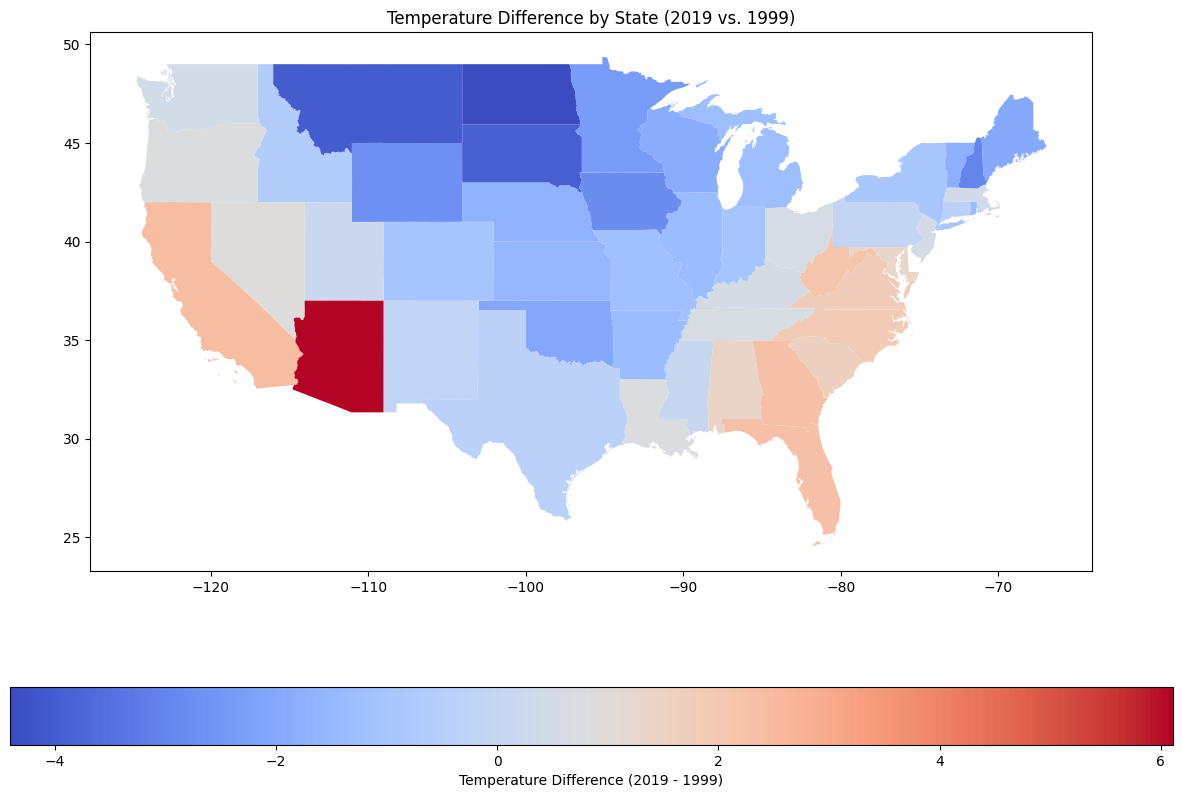

In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Ensure the merged data is a GeoDataFrame
if not isinstance(geo_temp_diff_filtered, gpd.GeoDataFrame):
    geo_temp_diff_filtered = gpd.GeoDataFrame(geo_temp_diff_filtered, geometry='geometry')

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
geo_temp_diff_filtered.plot(column='temp_difference', ax=ax, legend=True,
                   cmap='coolwarm',  # A good colormap for showing differences
                   legend_kwds={'label': "Temperature Difference (2019 - 1999)", 'orientation': "horizontal"})
ax.set_title('Temperature Difference by State (2019 vs. 1999)')
plt.show()
